In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [48]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [49]:
test.shape

(2947, 563)

In [50]:
sum(test.duplicated())

0

In [51]:
sum(train.duplicated())

0

In [52]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [53]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [54]:
train_duplicate_coloumns=train.columns[train.T.duplicated()].tolist()
test_duplicate_coloumns=test.columns[test.T.duplicated()].tolist()

In [55]:
sum(train.T.duplicated())
train.columns[train.T.duplicated()].tolist()

['tBodyAccMag-sma()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-sma()',
 'tBodyGyroMag-sma()',
 'tBodyGyroJerkMag-sma()',
 'fBodyAccMag-sma()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroJerkMag-sma()']

In [56]:
train.drop(train_duplicate_coloumns,axis=1,inplace=True)
test.drop(test_duplicate_coloumns,axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

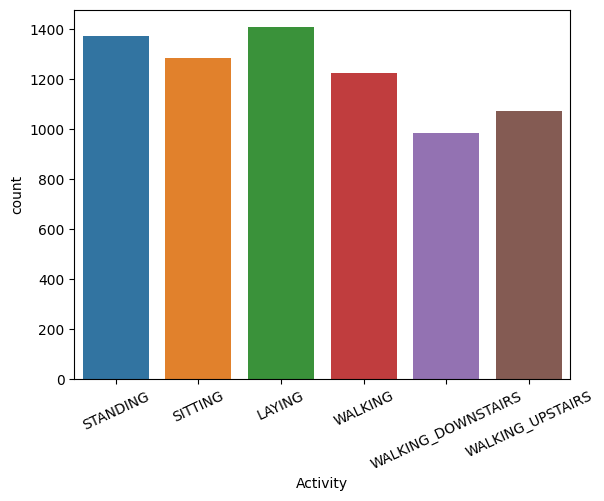

In [57]:
import seaborn as sns
sns.countplot(data=train,x='Activity')
plt.xticks(rotation=25)
plt.show

In [58]:
x_tr=train.drop('Activity',axis=1)
y_tr=train['Activity']
x_te=test.drop('Activity',axis=1)
y_te=test['Activity']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_tr,y_tr,test_size=0.2,random_state=6)

In [60]:
y_train.value_counts()

LAYING                1136
STANDING              1108
SITTING               1019
WALKING                980
WALKING_UPSTAIRS       849
WALKING_DOWNSTAIRS     789
Name: Activity, dtype: int64

In [61]:
#logistic regression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred1=log.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9836845683208701

In [63]:
accuracy_scores_of_models=[]

In [64]:
outp1=log.predict(x_te)
accuracy_score(y_te,outp1)

0.9511367492365117

In [65]:
accuracy_scores_of_models.append(accuracy_score(y_te,outp1))

In [66]:
#logistic scaling
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data
y_pred2=pipe.predict(x_test)
accuracy_score(y_test,y_pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.982324949014276

In [67]:
outp2=pipe.predict(x_te)
accuracy_score(y_te,outp2)

0.9474041398031897

In [68]:
accuracy_scores_of_models.append(accuracy_score(y_te,outp1))

In [69]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import recall_score,precision_score,f1_score

In [70]:
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          GradientBoostingClassifier(random_state=0)]


In [71]:
acc=[]
f1_scores = []

In [72]:
# for i in models:
#         model = i
#         model.fit(x_train,y_train)
#         predictions = model.predict(x_test)
#         acc.append(accuracy_score(y_test,predictions))
#         print(accuracy_score(y_test,predictions))


Accuracy for SVC: 0.9586019681031558
F1 Score for SVC: 0.9585249783661883


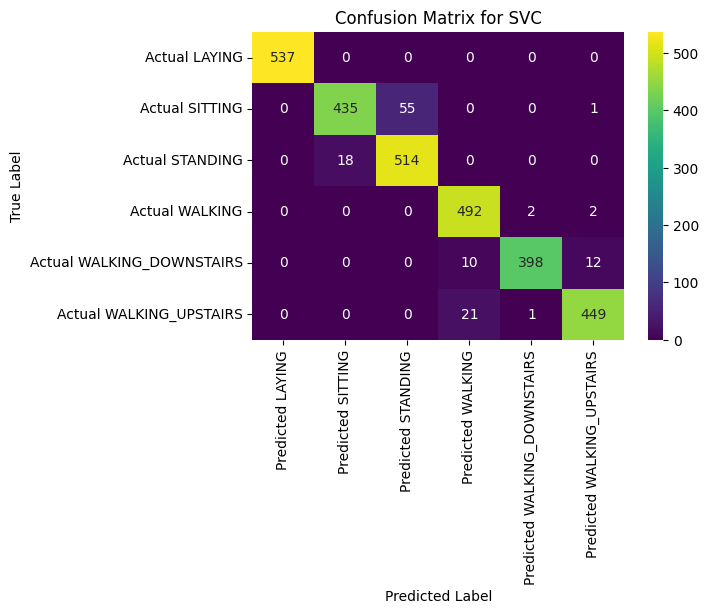

Accuracy for SVC: 0.9277231082456736
F1 Score for SVC: 0.9272623705257748


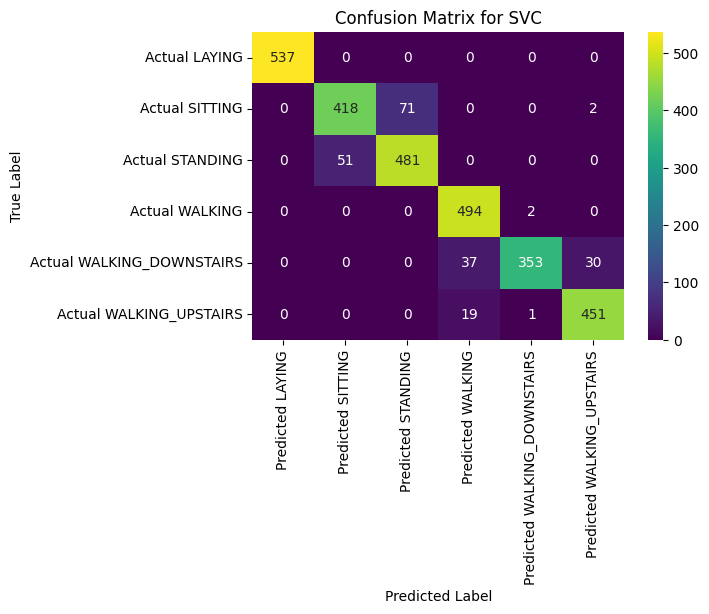

Accuracy for RandomForestClassifier: 0.9270444519850696
F1 Score for RandomForestClassifier: 0.9267949307264421


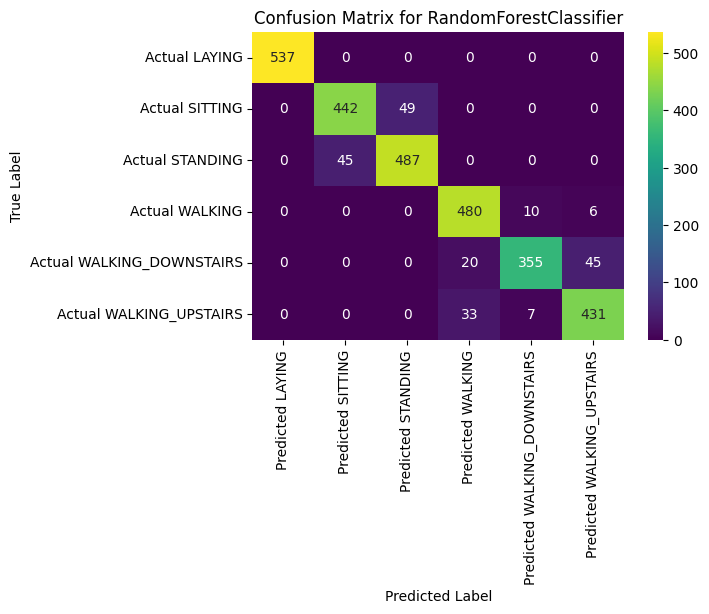

Accuracy for AdaBoostClassifier: 0.5310485239226331
F1 Score for AdaBoostClassifier: 0.39440793478364267


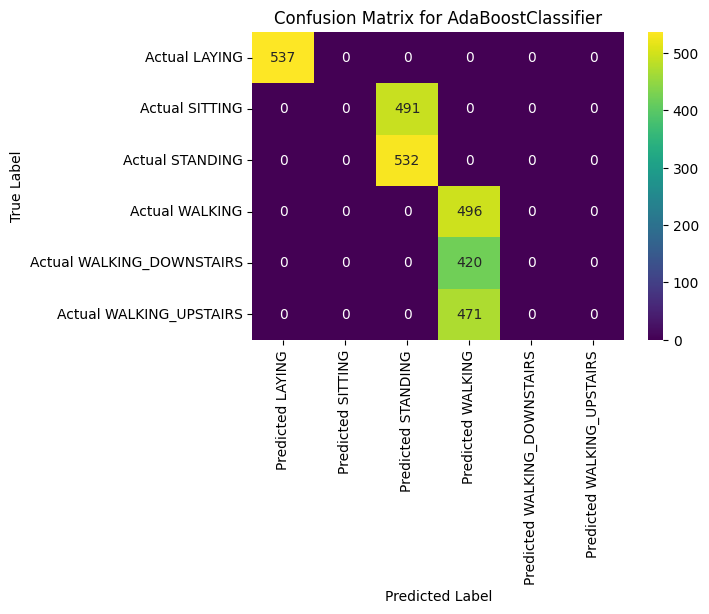

Accuracy for DecisionTreeClassifier: 0.838479809976247
F1 Score for DecisionTreeClassifier: 0.837518667569274


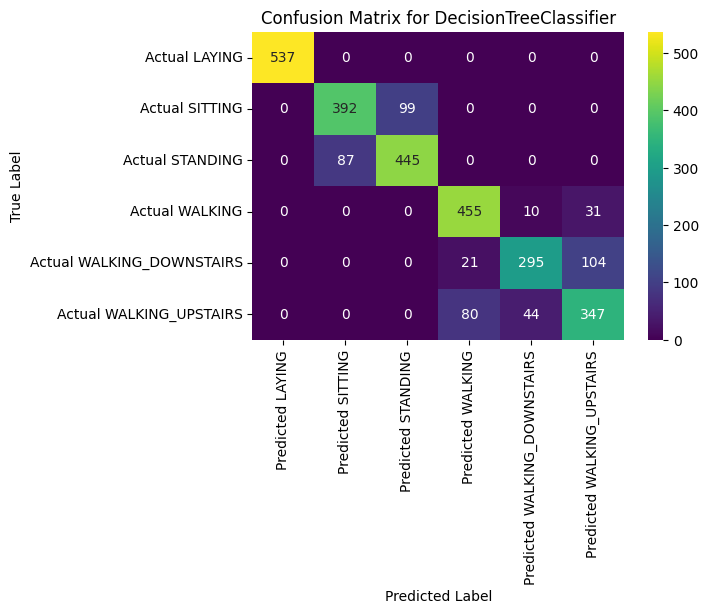

Accuracy for GradientBoostingClassifier: 0.9348489989820156
F1 Score for GradientBoostingClassifier: 0.9346721323123757


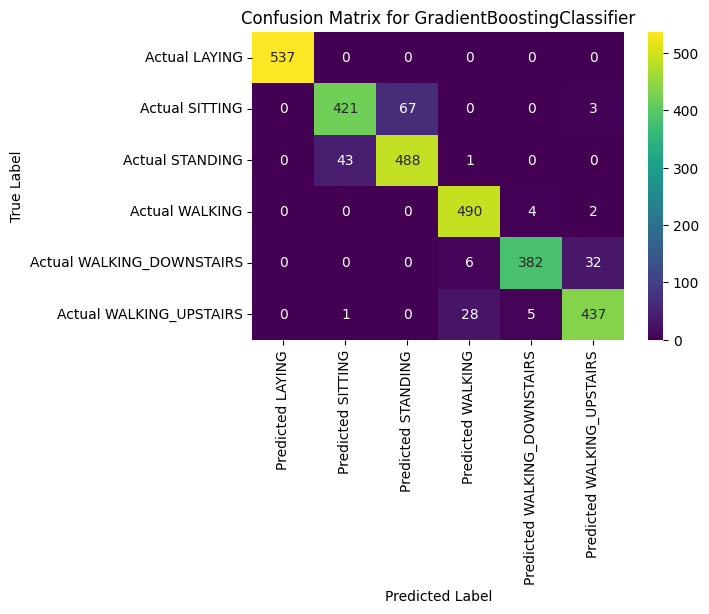

In [73]:
# confusion matrix
def plot_confusion_matrix(y_true, predictions, title):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, predictions)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(cm, columns=column, index=indices)

    plt.figure(figsize=(6, 4))
    sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_te)

    accuracy = accuracy_score(y_te, predictions)
    acc.append(accuracy)
    print(f"Accuracy for {type(model).__name__}: {accuracy}")

    f1 = f1_score(y_te, predictions, average='weighted')
    f1_scores.append(f1)
    print(f"F1 Score for {type(model).__name__}: {f1}")

    # Plot
    plot_confusion_matrix(y_te, predictions, f"Confusion Matrix for {type(model).__name__}")



In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_te)
accuracy_score(y_te, y_pred_knn)

0.7882592466915507

In [75]:
model1 = SVC(kernel='linear')
model1.fit(x_train, y_train)

SVC(kernel='linear')

In [76]:
ypd2g = model1.predict(x_te)
accuracy_score(y_te,ypd2g)

0.9586019681031558

In [77]:
# Confusion Matrix  logistic
def plot(y_true,outp1):
  labels = unique_labels(y_te)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,outp1),
                       columns=column,index=indices)
  return sns.heatmap(table, annot=True,fmt='d',cmap='viridis')

<Axes: >

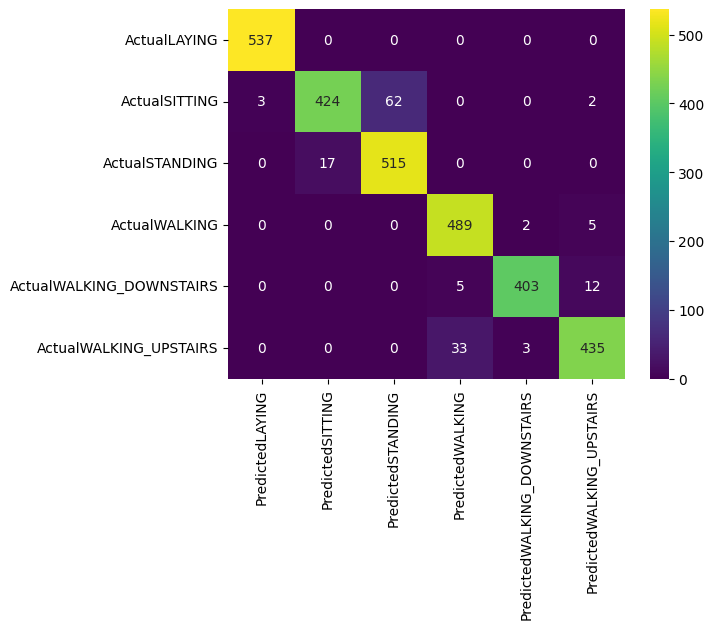

In [78]:
plot(y_te,outp1)

In [84]:
# Confusion Matrix  logistic Pipelining
def plot(y_true,outp2):
  labels = unique_labels(y_te)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,outp2),
                       columns=column,index=indices)
  return sns.heatmap(table, annot=True,fmt='d',cmap='viridis')

<Axes: >

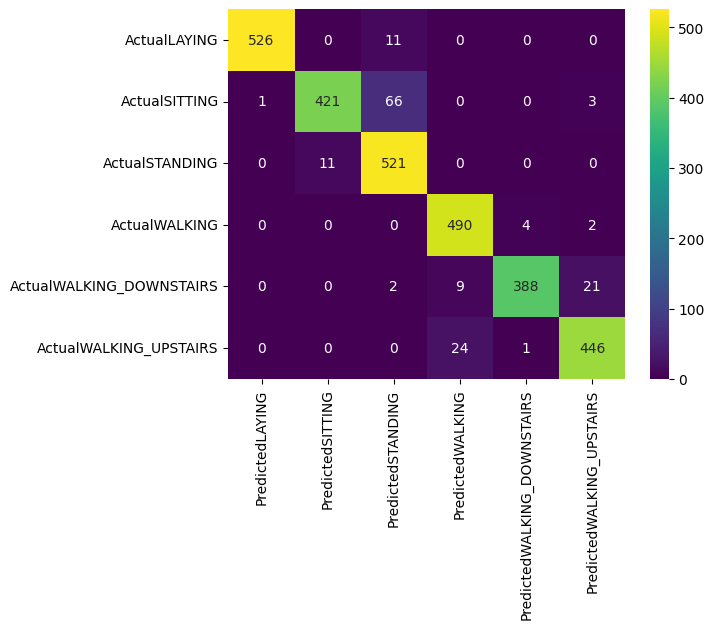

In [80]:
plot(y_te,outp2)

In [94]:
# Confusion Matrix  Knn
def plot(y_true,y_pred_knn):
  labels = unique_labels(y_te)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true,y_pred_knn),
                       columns=column,index=indices)
  return sns.heatmap(table, annot=True,fmt='d',cmap='viridis')

<Axes: >

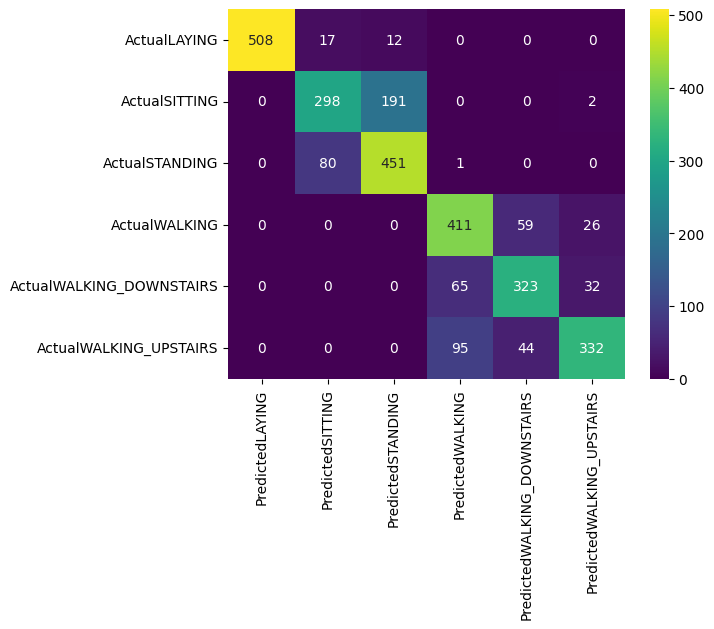

In [105]:
plot(y_te,y_pred_knn)